<a href="https://colab.research.google.com/github/meryfanou/DataMining_ClassificationModel/blob/main/data_mining_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Τεχνικές Εξόρυξης Δεδομένων  2η Άσκηση

###Παναγιώτης Γκίκας - 1115201700023
###Μερόπη Φανού - 1115201700176
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import string
from gensim.parsing.preprocessing import remove_stopwords

from wordcloud import WordCloud

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

import gensim.downloader as api

In [ ]:
!pip install --upgrade gensim

     |████████████████████████████████| 23.9MB 160kB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
# Read data

path = './drive/MyDrive/'

dtypes = {
  'title': 'object',
  'text': 'object',
  'subject': 'object',
  'date': 'object'
}

location = path + 'Fake.csv'
fake_df = pd.read_csv(location, dtype=dtypes, parse_dates=['date'])

location = path + 'True.csv'
true_df = pd.read_csv(location, dtype=dtypes, parse_dates=['date'])

fake_df.info()
print('\n')
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    21417 non-null  object        
 1   text     21417 non-null  object        
 2   subject  21417 non-null  object        
 3   date     21417 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 669.4+ KB


---
###1. Προεπεξεργασία - Καθάρισμα

- Από το παραπάνω κελί παίρνουμε την πληροφορία ότι τόσο στο dataframe fake_df όσο και στο true_df δεν παρουσιάζονται null γραμμές ώστε να τις διαγράψουμε
- Παρακάτω αφαιρούμε τα σημεία στίξης και τα stopwords από τα δύο dataframes και μετατρέπουμε όλα τα γράμματα σε πεζά

In [ ]:
# Remove punctuation using the string module & remove stopwords with gensim & turn all letters to lower case
def remove_punctuations(text):
  text = text.lower()
  text = remove_stopwords(text)
  for punctuation in string.punctuation:
      text = text.replace(punctuation, '')
  return text

# Create clean dataframe of fake news
fake_titles = fake_df['title'].apply(remove_punctuations)
fake_texts = fake_df['text'].apply(remove_punctuations)
fake_subjects = fake_df['subject'].apply(remove_punctuations)

data = { 'title': fake_titles, 'text': fake_texts, 'subject': fake_subjects, 'date': fake_df['date'] }
fake_df_clean = pd.DataFrame(data)

# Create clean dataframe of true news
true_titles = true_df['title'].apply(remove_punctuations)
true_texts = true_df['text'].apply(remove_punctuations)
true_subjects = true_df['subject'].apply(remove_punctuations)

data = { 'title': true_titles, 'text': true_texts, 'subject': true_subjects, 'date': true_df['date'] }
true_df_clean = pd.DataFrame(data)

---
###2. Μελέτη των δεδομένων

####α. Ο τίτλος καθορίζει αρκετά το περιεχόμενο ενός άρθρου. Προσπαθήστε να οπτικοποιήστε τους τίτλους των fake και των non-fake news έτσι ώστε να μπορεί κάποιος να εντοπίσει τα κεντρικά θέματα τα οποία διαπραγματεύονται τα άρθρα.

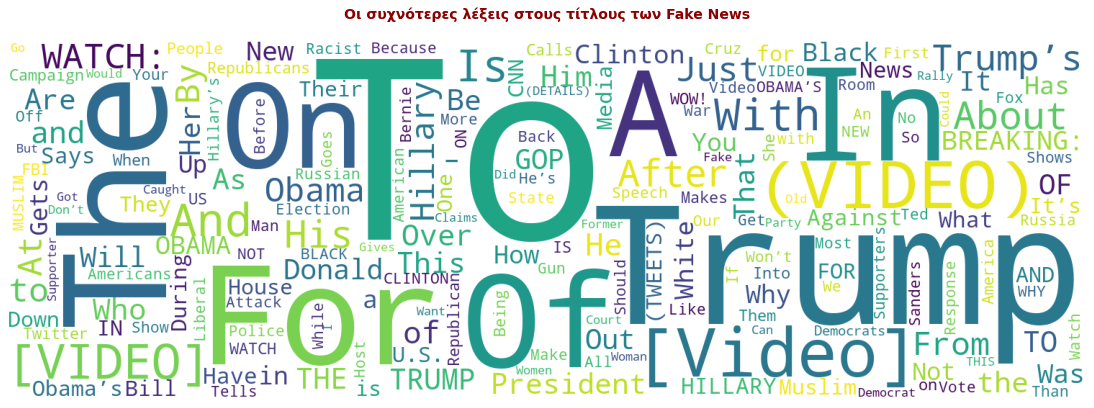

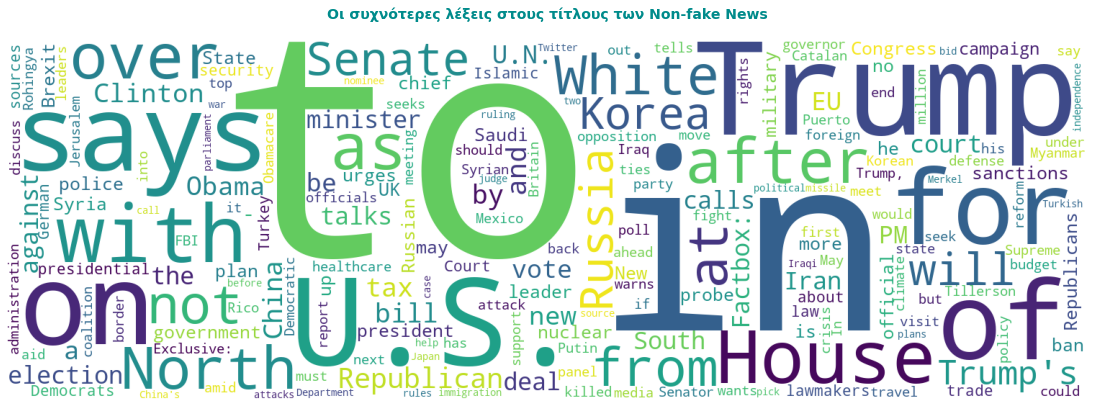

In [ ]:
# Create a word cloud for each dataframe (only the 'title' columns)

# Get an array of all fake titles
fake_titles = fake_df['title'].values
# Concat all titles to a string
words = ' '.join(fake_titles)

# Create a dictionary of each word in fake titles and its frequency
frequencies = dict()
for word in words.split():
  if(word not in frequencies):
    frequencies[word] = 1
  else:
    frequencies[word] += 1

# Create the word cloud from the words' frequncies
wordcloud = WordCloud(width = 1500, height = 500, background_color ='white', min_font_size = 10).generate_from_frequencies(frequencies)
# Plot the word cloud
plt.figure(figsize = (15, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Οι συχνότερες λέξεις στους τίτλους των Fake News\n', fontsize=14, fontweight='bold', color='darkred')
plt.show()
print('\n')


# Get an array of all true titles
true_titles = true_df['title'].values
# Concat all titles to a string
words = ' '.join(true_titles)

# Create a dictionary of each word in true titles and its frequency
frequencies = dict()
for word in words.split():
  if(word not in frequencies):
    frequencies[word] = 1
  else:
    frequencies[word] += 1

# Create the word cloud from the words' frequncies
wordcloud = WordCloud(width = 1500, height = 500, background_color ='white', min_font_size = 7).generate_from_frequencies(frequencies)
# Plot the word cloud
plt.figure(figsize = (15, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Οι συχνότερες λέξεις στους τίτλους των Non-fake News\n', fontsize=14, fontweight='bold', color='darkcyan')
plt.show()

####β. Σχεδιάστε γραφήματα που να δείχνουν το μέσο όρο των χαρακτήρων στα fake και στα true news αντίστοιχα. Κάντε το ίδιο και για τη στήλη text.

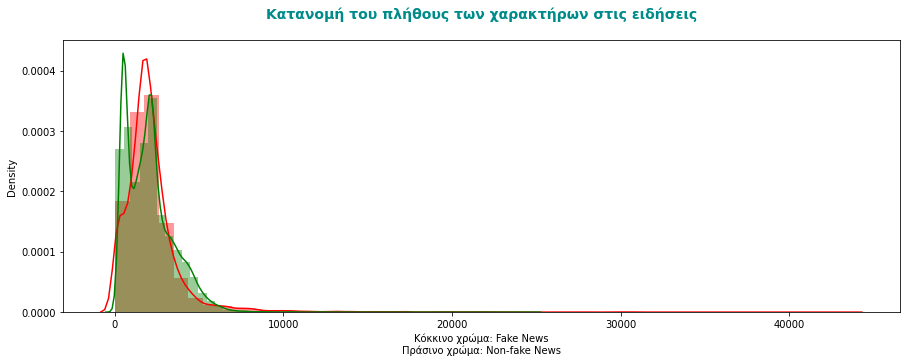


Μέσος όρος χαρακτήρων στις ψευδείς ειδήσεις:  2200.3540735062393
Μέσος όρος χαρακτήρων στις αληθινές ειδήσεις:  2056.1598729980856 



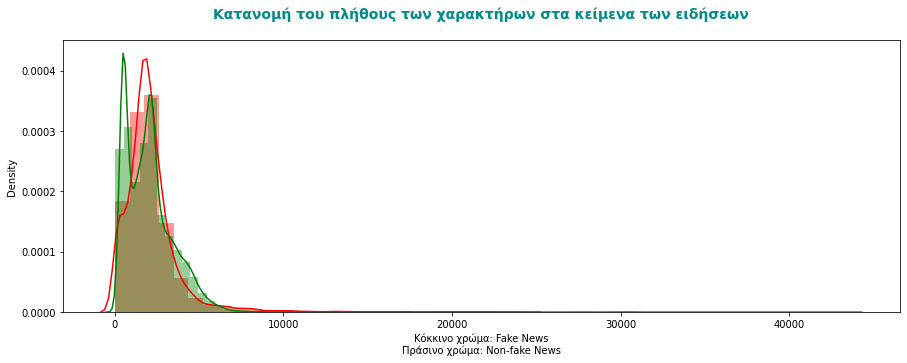


Μέσος όρος χαρακτήρων στα κείμενα των ψευδών ειδήσεων:  2113.159022188152
Μέσος όρος χαρακτήρων στα κείμενα των αληθινών ειδήσεων:  1989.8719241723863


In [ ]:
# For the fake news
fake_news_len = []
fake_texts_len = []
for i in fake_df.index:
  # Get the i-th row of the dataframe in an np array (except for the 'date' column)
  news = fake_df.iloc[i].values[:3]
  # Convert it to a string (removing the spaces between words)
  words = ''.join(news).replace(' ','')
  # Keep the number of characters in current news
  fake_news_len.append(len(words))

  # Also get the i-th text (as a string) and remove the spaces between the words
  text = fake_df['text'].iloc[i].replace(' ','')
  # Keep the number of characters in current text
  fake_texts_len.append(len(text))

# For the non-fake news
true_news_len = []
true_texts_len = []
for i in true_df.index:
  # Get the i-th row of the dataframe in an np array (except for the 'date' column)
  news = true_df.iloc[i].values[:3]
  # Convert it to a string (removing the spaces between words)
  words = ''.join(news).replace(' ','')
  # Keep the number of characters in current news
  true_news_len.append(len(words))

  # Also get the i-th text (as a string) and remove the spaces between the words
  text = true_df['text'].iloc[i].replace(' ','')
  # Keep the number of characters in current text
  true_texts_len.append(len(text))


# Distribution plot for the number of characters of all fake-news & non-fake news
plt.figure(figsize = (15, 5))
plt.title('Κατανομή του πλήθους των χαρακτήρων στις ειδήσεις\n', fontsize=14, fontweight='bold', color='darkcyan')
sns.distplot(fake_news_len, color='red')
sns.distplot(true_news_len, color='green', axlabel='Κόκκινο χρώμα: Fake News\nΠράσινο χρώμα: Non-fake News')
plt.show()

# Print the average number of characters of all fake news
avg_chars_fake = sum(fake_news_len) / len(fake_news_len)
print('\nΜέσος όρος χαρακτήρων στις ψευδείς ειδήσεις: ', avg_chars_fake)

# Print the average number of characters of all non-fake news
avg_chars_true = sum(true_news_len) / len(true_news_len)
print('Μέσος όρος χαρακτήρων στις αληθινές ειδήσεις: ', avg_chars_true, '\n')

# Distribution plot for the number of characters of all texts in fake-news & non-fake news
plt.figure(figsize = (15, 5))
plt.title('Κατανομή του πλήθους των χαρακτήρων στα κείμενα των ειδήσεων\n', fontsize=14, fontweight='bold', color='darkcyan')
sns.distplot(fake_news_len, color='red')
sns.distplot(true_news_len, color='green', axlabel='Κόκκινο χρώμα: Fake News\nΠράσινο χρώμα: Non-fake News')
plt.show()

# Print the average number of characters of all texts in fake news
avg_chars_fake = sum(fake_texts_len) / len(fake_texts_len)
print('\nΜέσος όρος χαρακτήρων στα κείμενα των ψευδών ειδήσεων: ', avg_chars_fake)

# Print the average number of characters of all texts in non-fake news
avg_chars_true = sum(true_texts_len) / len(true_texts_len)
print('Μέσος όρος χαρακτήρων στα κείμενα των αληθινών ειδήσεων: ', avg_chars_true)

####γ. Σχεδιάστε την κατανομή του αριθμού των λέξεων για τη στήλη title και για τη στήλη text (και για τα δύο αρχεία).

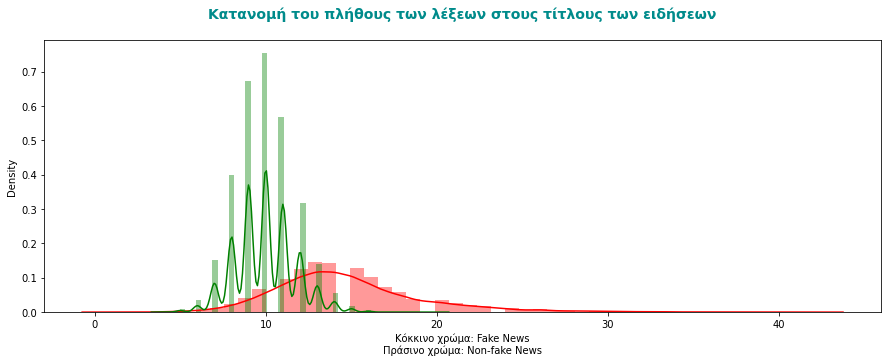

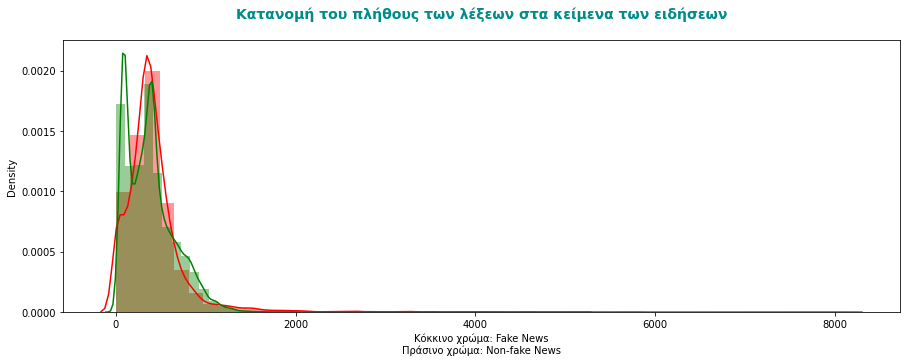

In [ ]:
# Get an array of all fake titles
fake_titles = fake_df['title'].values
# Create a list of the number of words per title in fake news
fake_titles_len = []
for title in fake_titles:
  fake_titles_len.append(len(title.split()))

# Get an array of all non-fake titles
true_titles = true_df['title'].values
# Create a list of the number of words per title in non-fake news
true_titles_len = []
for title in true_titles:
  true_titles_len.append(len(title.split()))

plt.figure(figsize = (15, 5))
plt.title('Κατανομή του πλήθους των λέξεων στους τίτλους των ειδήσεων\n', fontsize=14, fontweight='bold', color='darkcyan')
sns.distplot(fake_titles_len, color='red')
sns.distplot(true_titles_len, color='green', axlabel='Κόκκινο χρώμα: Fake News\nΠράσινο χρώμα: Non-fake News')
plt.show()
print('\n')

# Get an array of all fake texts
fake_texts = fake_df['text'].values
# Create a list of the number of words per text in fake news
fake_texts_len = []
for text in fake_texts:
  fake_texts_len.append(len(text.split()))

# Get an array of all non-fake texts
true_texts = true_df['text'].values
# Create a list of the number of words per text in non-fake news
true_texts_len = []
for text in true_texts:
  true_texts_len.append(len(text.split()))

plt.figure(figsize = (15, 5))
plt.title('Κατανομή του πλήθους των λέξεων στα κείμενα των ειδήσεων\n', fontsize=14, fontweight='bold', color='darkcyan')
sns.distplot(fake_texts_len, color='red')
sns.distplot(true_texts_len, color='green', axlabel='Κόκκινο χρώμα: Fake News\nΠράσινο χρώμα: Non-fake News')
plt.show()

####δ. Επαναλλάβετε το προηγούμενο ερώτημα αφαιρώντας τα stopwords.

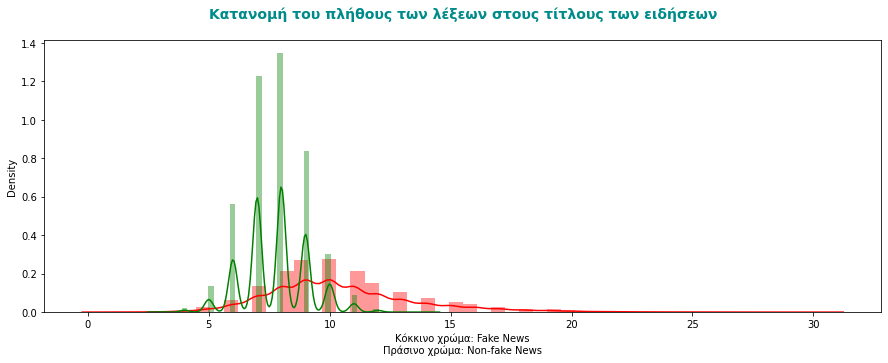

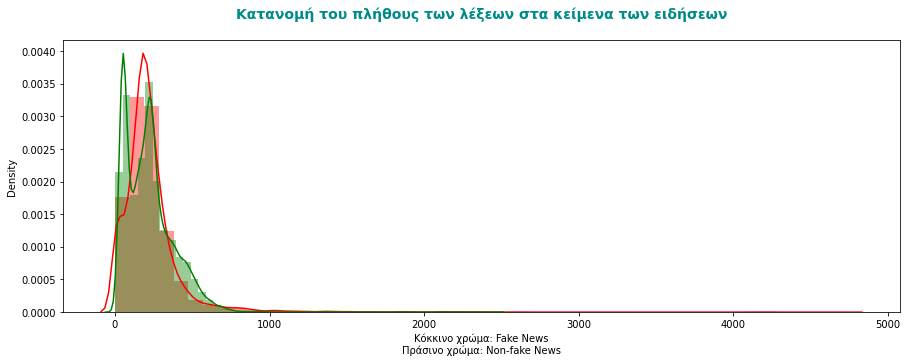

In [ ]:
# Here we will use the 'clean' dataframes

# Get an array of all fake titles
fake_titles = fake_df_clean['title'].values
# Create a list of the number of words per title in fake news
fake_titles_len = []
for title in fake_titles:
  fake_titles_len.append(len(title.split()))

# Get an array of all non-fake titles
true_titles = true_df_clean['title'].values
# Create a list of the number of words per title in non-fake news
true_titles_len = []
for title in true_titles:
  true_titles_len.append(len(title.split()))

plt.figure(figsize = (15, 5))
plt.title('Κατανομή του πλήθους των λέξεων στους τίτλους των ειδήσεων\n', fontsize=14, fontweight='bold', color='darkcyan')
sns.distplot(fake_titles_len, color='red')
sns.distplot(true_titles_len, color='green', axlabel='Κόκκινο χρώμα: Fake News\nΠράσινο χρώμα: Non-fake News')
plt.show()
print('\n')

# Get an array of all fake texts
fake_texts = fake_df_clean['text'].values
# Create a list of the number of words per text in fake news
fake_texts_len = []
for text in fake_texts:
  fake_texts_len.append(len(text.split()))

# Get an array of all non-fake texts
true_texts = true_df_clean['text'].values
# Create a list of the number of words per text in non-fake news
true_texts_len = []
for text in true_texts:
  true_texts_len.append(len(text.split()))

plt.figure(figsize = (15, 5))
plt.title('Κατανομή του πλήθους των λέξεων στα κείμενα των ειδήσεων\n', fontsize=14, fontweight='bold', color='darkcyan')
sns.distplot(fake_texts_len, color='red')
sns.distplot(true_texts_len, color='green', axlabel='Κόκκινο χρώμα: Fake News\nΠράσινο χρώμα: Non-fake News')
plt.show()

#### ε. Ποιά είναι τα πιο συχνά (πχ 10 ή 20) bigrams στους τίτλους και ποιά στο κυρίως άρθρο;

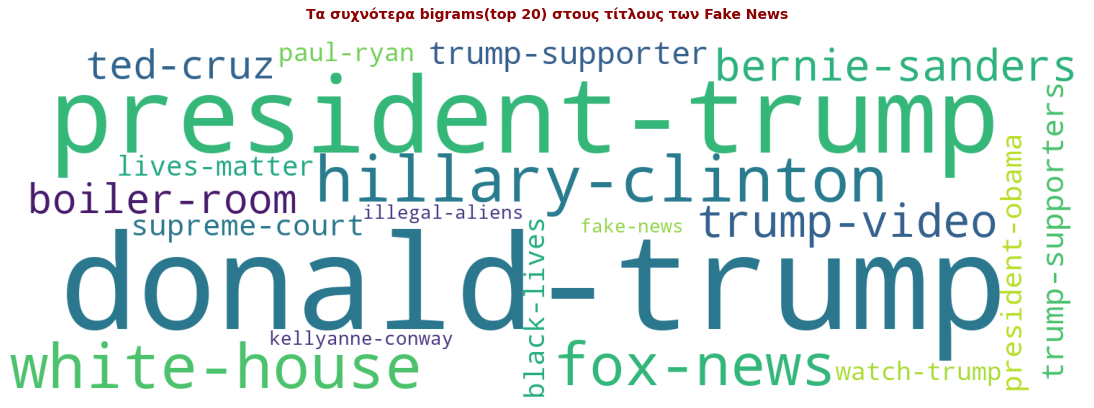

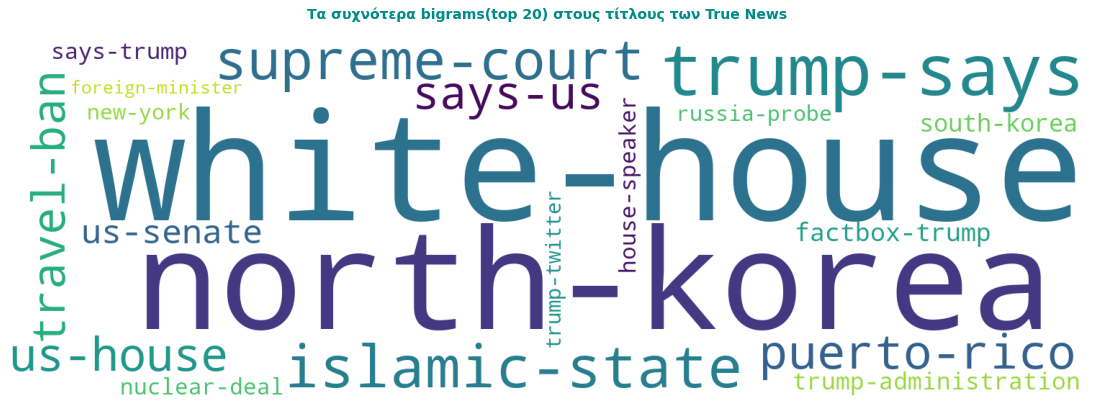

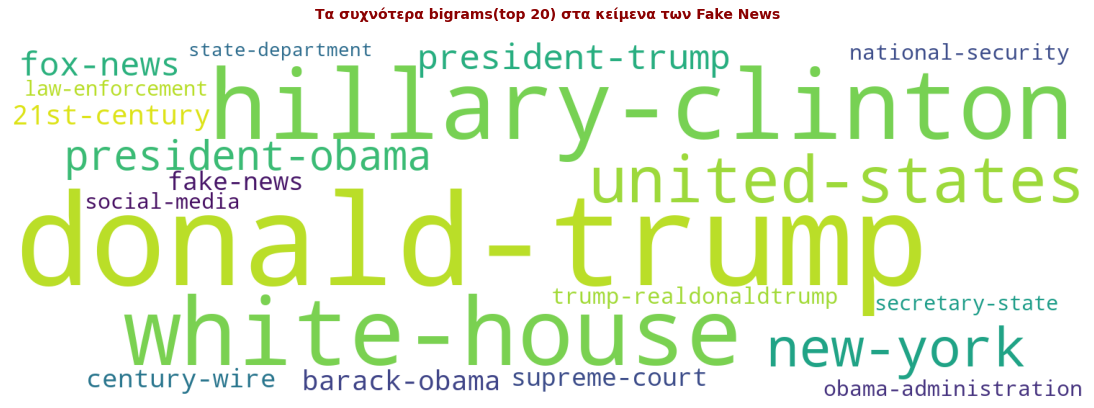

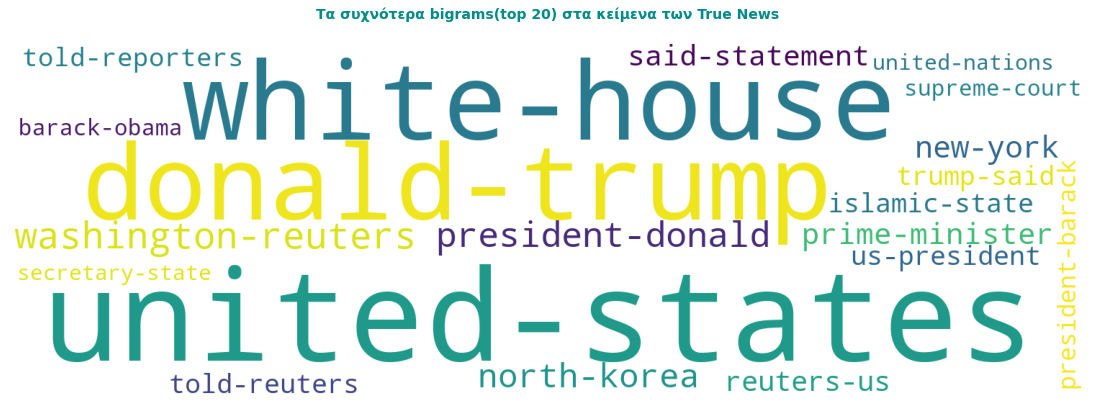

In [ ]:
# Create a word cloud for each dataframe

# Clean the dataframes
fake_df = fake_df_clean
true_df = true_df_clean

#TITLES
# Get an array of all fake titles
fake_titles = fake_df['title'].values

# Create a dictionary of each bigram in fake titles and its frequency
bigram_frequencies = dict()
i = 0
while i < len(fake_titles):
  words = fake_titles[i].split()
  for index, word in enumerate(words):
    if (index < (len(words)-1)):
      # Skip bigrams like isn't, hasn't, etc
      if (len(word) == 1 or len(words[index+1]) == 1):
        continue
      bigram = '-'.join([word,words[index+1]])
      if (bigram not in bigram_frequencies):
        bigram_frequencies[bigram] = 1
      else:
        bigram_frequencies[bigram] += 1
  i += 1

# Sort the dictionary
bigram_frequencies = dict(sorted(bigram_frequencies.items(), key=lambda item: item[1], reverse=True))

# Create the word cloud from the bigrams' frequencies
wordcloud = WordCloud(width = 1500, height = 500, background_color ='white', min_font_size = 10).generate_from_frequencies(dict(list(bigram_frequencies.items())[:20]))
# Plot the word cloud
plt.figure(figsize = (15, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Τα συχνότερα bigrams(top 20) στους τίτλους των Fake News\n', fontsize=14, fontweight='bold', color='darkred')
plt.show()
print('\n')

# Get an array of all true titles
true_titles = true_df['title'].values

# Create a dictionary of each bigram in true titles and its frequency
bigram_frequencies = dict()
i = 0
while i < len(true_titles):
  words = true_titles[i].split()
  for index, word in enumerate(words):
    if (index < (len(words)-1)):
      # Skip bigrams like isn't, hasn't, etc
      if (len(word) == 1 or len(words[index+1]) == 1):
        continue
      bigram = '-'.join([word,words[index+1]])
      if (bigram not in bigram_frequencies):
        bigram_frequencies[bigram] = 1
      else:
        bigram_frequencies[bigram] += 1
  i += 1

# Sort the dictionary
bigram_frequencies = dict(sorted(bigram_frequencies.items(), key=lambda item: item[1], reverse=True))

# Create the word cloud from the bigrams' frequencies
wordcloud = WordCloud(width = 1500, height = 500, background_color ='white', min_font_size = 7).generate_from_frequencies(dict(list(bigram_frequencies.items())[:20]))
# Plot the word cloud
plt.figure(figsize = (15, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Τα συχνότερα bigrams(top 20) στους τίτλους των True News\n', fontsize=14, fontweight='bold', color='darkcyan')
plt.show()
print('\n')

#TEXTS
# Get an array of all fake texts
fake_texts = fake_df['text'].values

# Create a dictionary of each bigram in fake texts and its frequency
bigram_frequencies = dict()
i = 0
while i < len(fake_texts):
  words = fake_texts[i].split()
  for index, word in enumerate(words):
    if (index < (len(words)-1)):
      # Skip bigrams like isn't, hasn't, etc
      if (len(word) == 1 or len(words[index+1]) == 1):
        continue
      bigram = '-'.join([word,words[index+1]])
      if (bigram not in bigram_frequencies):
        bigram_frequencies[bigram] = 1
      else:
        bigram_frequencies[bigram] += 1
  i += 1

# Sort the dictionary
bigram_frequencies = dict(sorted(bigram_frequencies.items(), key=lambda item: item[1], reverse=True))

# Create the word cloud from the bigrams' frequencies
wordcloud = WordCloud(width = 1500, height = 500, background_color ='white', min_font_size = 10).generate_from_frequencies(dict(list(bigram_frequencies.items())[:20]))
# Plot the word cloud
plt.figure(figsize = (15, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Τα συχνότερα bigrams(top 20) στα κείμενα των Fake News\n', fontsize=14, fontweight='bold', color='darkred')
plt.show()
print('\n')

# Get an array of all true texts
true_texts = true_df['text'].values

# Create a dictionary of each bigram in true texts and its frequency
bigram_frequencies = dict()
i = 0
while i < len(true_texts):
  words = true_texts[i].split()
  for index, word in enumerate(words):
    if (index < (len(words)-1)):
      # Skip bigrams like isn't, hasn't, etc
      if (len(word) == 1 or len(words[index+1]) == 1):
        continue
      bigram = '-'.join([word,words[index+1]])
      if (bigram not in bigram_frequencies):
        bigram_frequencies[bigram] = 1
      else:
        bigram_frequencies[bigram] += 1
  i += 1

# Sort the dictionary
bigram_frequencies = dict(sorted(bigram_frequencies.items(), key=lambda item: item[1], reverse=True))

# Create the word cloud from the bigrams' frequencies
wordcloud = WordCloud(width = 1500, height = 500, background_color ='white', min_font_size = 7).generate_from_frequencies(dict(list(bigram_frequencies.items())[:20]))
# Plot the word cloud
plt.figure(figsize = (15, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Τα συχνότερα bigrams(top 20) στα κείμενα των True News\n', fontsize=14, fontweight='bold', color='darkcyan')
plt.show()
print('\n')

---
###3. Δημιουργία συνόλου εκμάθησης και δοκιμής

In [ ]:
# Percentage of the initial file (Fake.csv or True.csv) that will be kept for the train set
train_perc = 0.6
# Number of rows for the train set of the fake news
fake_train_rows = int(train_perc*fake_df.shape[0])
# Number of rows for the test set of the non-fake news
true_train_rows = int(train_perc*true_df.shape[0])

# Get subset of fake news for the train set
fake_df_train = fake_df[:fake_train_rows]
# Create the 'label' column
label = [0]*(fake_df_train.shape[0])
fake_df_train['label'] = label
# Get subset of fake news for the test set
fake_df_test = fake_df[(fake_train_rows+1):]
# Create the 'label' column
label = [0]*(fake_df_test.shape[0])
fake_df_test['label'] = label

# Get subset of non-fake news for the train set
true_df_train = true_df[:true_train_rows]
# Create the 'label' column
label = [1]*(true_df_train.shape[0])
true_df_train['label'] = label
# Get subset of non-fake news for the test set
true_df_test = true_df[(true_train_rows+1):]
# Create the 'label' column
label = [1]*(true_df_test.shape[0])
true_df_test['label'] = label

print('Αριθμός fake ειδήσεων στο train set:',fake_df_train.shape[0],'(52.3%)')
print('Αριθμός non-fake ειδήσεων στο train set:',true_df_train.shape[0],'(47.7%)')
print('Αριθμός fake ειδήσεων στο test set:',fake_df_test.shape[0],'(52.3%)')
print('Αριθμός non-fake ειδήσεων στο test set:',true_df_test.shape[0],'(47.7%)')


# Create train.csv file
location = path + 'train.csv'
train_df = fake_df_train.append([true_df_train])
train_df.to_csv(path_or_buf=location, index=False)

# Create test.csv file
location = path + 'test.csv'
test_df = fake_df_test.append([true_df_test])
test_df.to_csv(path_or_buf=location, index=False)

Αριθμός fake ειδήσεων στο train set: 14088 (52.3%)
Αριθμός non-fake ειδήσεων στο train set: 12850 (47.7%)
Αριθμός fake ειδήσεων στο test set: 9392 (52.3%)
Αριθμός non-fake ειδήσεων στο test set: 8566 (47.7%)


---
###4. Υλοποίηση Κατηγοριοποίησης (Classification)

In [ ]:
# Read train & test csv files

dtypes = {
  'title': 'object',
  'text': 'object',
  'subject': 'object',
  'date': 'object',
  'label': 'int64'
}

# Read train.csv
location = './drive/MyDrive/train.csv'
train_df = pd.read_csv(location, dtype=dtypes, parse_dates=['date'])

# Data to train the models

# Get label column
trainlabel = train_df['label']
# Get the data of the 'title', 'text' & 'subject' columns
traindata = train_df.drop(['label','date'],1)
# Check if there is any NaN data
nandata = traindata.isna().values.tolist()
# Keep the indexes of the NaN data
drop_indexes = [i for i, data in enumerate(nandata) for value in data if value == True ]
# Drop NaN data from the traindata
traindata = np.asarray(traindata.dropna())
# Drop NaN data from the labels as well
trainlabel.drop(labels=drop_indexes, inplace=True)
trainlabel = np.asarray(trainlabel)

print('Αριθμός ειδήσεων στο train set: ', len(traindata))

# Read test.csv
location = './drive/MyDrive/test.csv'
test_df = pd.read_csv(location, dtype=dtypes, parse_dates=['date'])

# Data to test the models

# Get label column
testlabel = test_df['label']
# Get the data of the 'title', 'text' & 'subject' columns
testdata = test_df.drop(['label','date'],1)
# Check if there is any NaN data
nandata = testdata.isna().values.tolist()
# Keep the indexes of the NaN data
drop_indexes = [i for i, data in enumerate(nandata) for value in data if value == True ]
# Drop NaN data from the testdata
testdata = np.asarray(testdata.dropna())
# Drop NaN data from the labels as well
testlabel.drop(labels=drop_indexes, inplace=True)
testlabel = np.asarray(testlabel)

print('Αριθμός ειδήσεων στο test set: ', len(testdata))

Αριθμός ειδήσεων στο train set:  26564
Αριθμός ειδήσεων στο test set:  17701


In [ ]:
# Create the input for all representations (BoW, tf-idf, Word2Vec) of the train set (we use the columns 'title','text' and 'subject' of the data)
train_input = [' '.join(data) for data in traindata]
# Create the input for all representations (BoW, tf-idf, Word2Vec) of the test set (we use the columns 'title','text' and 'subject' of the data)
test_input = [' '.join(data) for data in testdata]

####Η κατηγοριοποίηση να γίνει στις εξής διαφορετικέςαναπαραστάσεις των κειμένων:

####1. Στον αντίστοιχο πίνακα document-words που θα προκύψει από την BoW αναπαράσταση των κειμένων τόσο σε απλά counts, όσο και ξεχωριστά στον tf-idf μετασχηματισμό των counts.

#####Για λόγους αποδοτικότητας, μετατρέπουμε τόσο τον πίνακα BoW όσο και τον tf-idf στην sparse μορφή τους.

In [ ]:
# Create BoW representation of train & test sets
# --------------------------------------------------

# Create a BoW vectorizer with the appropriate params
bow_vectorizer = CountVectorizer(ngram_range=(1,2), min_df=2, max_features=300)

# Get a BoW representation of the train set
bow_xtrain = bow_vectorizer.fit_transform(train_input)
# Get the BoW array of the train set
trainBow = bow_xtrain.toarray()
# Turn BoW array into sparse
trainBow = csr_matrix(trainBow)

(rows, cols) = trainBow.shape
print('Αριθμός γραμμών (ειδήσεων) στην BoW αναπαράσταση του train set: {}\nΑριθμός στηλών (λέξεων) στην BoW αναπαράσταση του train set: {}\n'.format(rows,cols))


# Get a BoW representation of the test set
bow_xtrain = bow_vectorizer.fit_transform(test_input)
# Get the BoW array of the test set
testBow = bow_xtrain.toarray()
# Turn BoW array into sparse
testBow = csr_matrix(testBow)

(rows, cols) = testBow.shape
print('Αριθμός γραμμών (ειδήσεων) στην BoW αναπαράσταση του test set: {}\nΑριθμός στηλών (λέξεων) στην BoW αναπαράσταση του test set: {}\n'.format(rows,cols))


# Create tf-idf representations of train & test sets
# --------------------------------------------------

# Create a tf-idf vectorizer with the appropriate params
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2, max_features=300)

# Get a tf-idf representation of the train set
tfidf_xtrain = tfidf_vectorizer.fit_transform(train_input)
# Get the tf-idf array of the train set
trainTfidf = tfidf_xtrain.toarray()
# Turn tf-idf array into sparse
trainTfidf = csr_matrix(trainTfidf)
(rows, cols) = trainTfidf.shape
print('Αριθμός γραμμών (ειδήσεων) στην tf-idf αναπαράσταση του train set: {}\nΑριθμός στηλών (λέξεων) στην tf-idf αναπράσταση του train set: {}\n'.format(rows,cols))


# Get a tf-idf representation of the test set
tfidf_xtrain = tfidf_vectorizer.fit_transform(test_input)
# Get the tf-idf array of the test set
testTfidf = tfidf_xtrain.toarray()
# Turn tf-idf array into sparse
testTfidf = csr_matrix(testTfidf)

(rows, cols) = testTfidf.shape
print('Αριθμός γραμμών (ειδήσεων) στην tf-idf αναπαράσταση του test set: {}\nΑριθμός στηλών (λέξεων) στην tf-idf αναπαράσταση του test set: {}\n'.format(rows,cols))

Αριθμός γραμμών (ειδήσεων) στην BoW αναπαράσταση του train set: 26564
Αριθμός στηλών (λέξεων) στην BoW αναπαράσταση του train set: 300

Αριθμός γραμμών (ειδήσεων) στην BoW αναπαράσταση του test set: 17701
Αριθμός στηλών (λέξεων) στην BoW αναπαράσταση του test set: 300

Αριθμός γραμμών (ειδήσεων) στην tf-idf αναπαράσταση του train set: 26564
Αριθμός στηλών (λέξεων) στην tf-idf αναπράσταση του train set: 300

Αριθμός γραμμών (ειδήσεων) στην tf-idf αναπαράσταση του test set: 17701
Αριθμός στηλών (λέξεων) στην tf-idf αναπαράσταση του test set: 300



#####α. Με τη μέθοδο Logistic Regression

In [ ]:
# Logistic Regression Model

# Create model
model = LogisticRegression()
# Train model
model.fit(trainBow,trainlabel)

print('Απόδοση της μεθόδου Logistic Regression για την αναπαράσταση των ειδήσεων με BoW:')
# Test model with the BoW (based on accuracy & f1 score)
accuracy = model.score(testBow, testlabel)
print("accuracy = ", accuracy * 100, "%")
predicted = model.predict(testBow)
f1_score_bow = f1_score(testlabel, predicted)
print("f1 score = ", f1_score_bow * 100, "%")

# Create model
model_tfidf = LogisticRegression()
# Train model with the tf-idf representation
model_tfidf.fit(trainTfidf, trainlabel)

print('\nΑπόδοση της μεθόδου Logistic Regression για την αναπαράσταση των ειδήσεων με tf-idf:')
# Test model with the tf-idf representation (based on accuracy & f1 score)
accuracy_tfidf = model_tfidf.score(testTfidf, testlabel)
print("accuracy = ", accuracy_tfidf * 100, "%")
predicted_tfidf = model_tfidf.predict(testTfidf)
f1_score_tfidf = f1_score(testlabel, predicted_tfidf)
print("f1 score = ", f1_score_tfidf * 100, "%")

Απόδοση της μεθόδου Logistic Regression για την αναπαράσταση των ειδήσεων με BoW:
accuracy =  62.776114343822385 %
f1 score =  53.9069604756908 %

Απόδοση της μεθόδου Logistic Regression για την αναπαράσταση των ειδήσεων με tf-idf:
accuracy =  65.78724365855037 %
f1 score =  60.6957424714434 %


#####β. Με τη μέθοδο Naive Bayes

######Για λόγους αποδοτικότητας, χρησιμοποιείται το Multinomial Naive Bayes μοντέλο.

In [ ]:
# Naive Bayes Model

# Create model
model_bow = MultinomialNB()
# Train model with the BoW representation
model_bow.fit(trainBow, trainlabel)

print('Απόδοση της μεθόδου Naive Bayes για την αναπαράσταση των ειδήσεων με BoW:')
# Test model with the BoW representation (based on accuracy & f1 score)
accuracy_bow = model_bow.score(testBow, testlabel)
print("accuracy = ", accuracy_bow * 100, "%")
predicted_bow = model_bow.predict(testBow)
f1_score_bow = f1_score(testlabel, predicted_bow)
print("f1 score = ", f1_score_bow * 100, "%")

# Create model
model_tfidf = MultinomialNB()
# Train model with the tf-idf representation
model_tfidf.fit(trainTfidf, trainlabel)

print('\nΑπόδοση της μεθόδου Naive Bayes για την αναπαράσταση των ειδήσεων με tf-idf:')
# Test model with the tf-idf representation (based on accuracy & f1 score)
accuracy_tfidf = model_tfidf.score(testTfidf, testlabel)
print("accuracy = ", accuracy_tfidf * 100, "%")
predicted_tfidf = model_tfidf.predict(testTfidf)
f1_score_tfidf = f1_score(testlabel, predicted_tfidf)
print("f1 score = ", f1_score_tfidf * 100, "%")

Απόδοση της μεθόδου Naive Bayes για την αναπαράσταση των ειδήσεων με BoW:
accuracy =  72.02982882323032 %
f1 score =  74.88714177022572 %

Απόδοση της μεθόδου Naive Bayes για την αναπαράσταση των ειδήσεων με tf-idf:
accuracy =  65.88893282865375 %
f1 score =  66.39581478183439 %


#####γ. Με τη μέθοδο Support Vector Machines (SVM, να πειραματιστείτε με τις παραμέτρους kernel(rbf, linear), c και gamma. H επιλογή των παραμέτρων μπορεί να γίνει και μεGridSearchCV).

######Με τη βοήθεια της GridSearchCV και για ένα υποσύνολο των δεδομένων (για λόγους αποτελεσματικότητας), παίρνουμε από το παρακάτω κελί που είναι σχολιασμένο, ότι οι καλύτερες παράμετροι για το SVΜ (τις οποίες και θα χρησιμοποιήσουμε στη συνέχεια) είναι οι εξής:
για την αναπαράσταση με BoW:{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

για την αναπαράσταση με tf-idf:{'C': 10, 'kernel': 'linear'}

In [ ]:
# # SVM model with GridSearchCV

# # Defining parameter range
# param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 
#                'C': [1, 10, 100, 1000]},
#               {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# # Create model
# #model_bow = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# model_bow = GridSearchCV(SVC(), param_grid) 
# # Train model with the BoW representation
# model_bow.fit(trainBow, trainlabel)

# # Get the best combination of parameters
# print(model_bow.best_params_)

# print('\nΑπόδοση της μεθόδου Support Vector Machines με GridSearchCV parameters για την αναπαράσταση των ειδήσεων με BoW:')
# # Test model with the BoW representation (based on accuracy & f1 score)
# accuracy_bow = model_bow.score(testBow, testlabel)
# print("accuracy = ", accuracy_bow * 100, "%")
# predicted_bow = model_bow.predict(testBow)
# f1_score_bow = f1_score(testlabel, predicted_bow)
# print("f1 score = ", f1_score_bow * 100, "%")

# # Create model
# #model_tfidf = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# model_tfidf = GridSearchCV(SVC(), param_grid)
# # Train model with the tf-idf representation
# model_tfidf.fit(trainTfidf, trainlabel)

# # Get the best combination of parameters
# print(model_tfidf.best_params_)

# print('\nΑπόδοση της μεθόδου Support Vector Machines με GridSearchCV parameters για την αναπαράσταση των ειδήσεων με tf-idf:')
# # Test model with the tf-idf representation (based on accuracy & f1 score)
# accuracy_tfidf = model_tfidf.score(testTfidf, testlabel)
# print("accuracy = ", accuracy_tfidf * 100, "%")
# predicted_tfidf = model_tfidf.predict(testTfidf)
# f1_score_tfidf = f1_score(testlabel, predicted_tfidf)
# print("f1 score = ", f1_score_tfidf * 100, "%")

In [ ]:
#SVM model

# Create model
model_bow = SVC(kernel='rbf', gamma=0.0001, C=100)
# Train model with the BoW representation
model_bow.fit(trainBow, trainlabel)

print('Απόδοση της μεθόδου Support Vector Machines με κατάλληλα parameters για την αναπαράσταση των ειδήσεων με BoW:')
# Test model with the BoW representation (based on accuracy & f1 score)
accuracy_bow = model_bow.score(testBow, testlabel)
print("accuracy = ", accuracy_bow * 100, "%")
predicted_bow = model_bow.predict(testBow)
f1_score_bow = f1_score(testlabel, predicted_bow)
print("f1 score = ", f1_score_bow * 100, "%")

# Create model
model_tfidf = SVC(kernel='linear', C=10)
# Train model with the tf-idf representation
model_tfidf.fit(trainTfidf, trainlabel)

print('\nΑπόδοση της μεθόδου Support Vector Machines με κατάλληλα parameters για την αναπαράσταση των ειδήσεων με tf-idf:')
# Test model with the tf-idf representation (based on accuracy & f1 score)
accuracy_tfidf = model_tfidf.score(testTfidf, testlabel)
print("accuracy = ", accuracy_tfidf * 100, "%")
predicted_tfidf = model_tfidf.predict(testTfidf)
f1_score_tfidf = f1_score(testlabel, predicted_tfidf)
print("f1 score = ", f1_score_tfidf * 100, "%")

Απόδοση της μεθόδου Support Vector Machines με κατάλληλα parameters για την αναπαράσταση των ειδήσεων με BoW:
accuracy =  52.923563640472295 %
f1 score =  32.81464161896315 %

Απόδοση της μεθόδου Support Vector Machines με κατάλληλα parameters για την αναπαράσταση των ειδήσεων με tf-idf:
accuracy =  59.77628382577256 %
f1 score =  51.31291028446389 %


#####δ. Με τη μέθοδο Random Forests

In [ ]:
# Random Forests Model

# Create model
model_bow = RandomForestClassifier()
# Train model with the BoW representation
model_bow.fit(trainBow, trainlabel)

print('Απόδοση της μεθόδου Random Forest για την αναπαράσταση των ειδήσεων με BoW:')
# Test model with the BoW representation (based on accuracy & f1 score)
accuracy_bow = model_bow.score(testBow, testlabel)
print("accuracy = ", accuracy_bow * 100, "%")
predicted_bow = model_bow.predict(testBow)
f1_score_bow = f1_score(testlabel, predicted_bow)
print("f1 score = ", f1_score_bow * 100, "%")

# Create model
model_tfidf = RandomForestClassifier()
# Train model with the tf-idf representation
model_tfidf.fit(trainTfidf, trainlabel)

print('\nΑπόδοση της μεθόδου Random Forest για την αναπαράσταση των ειδήσεων με tf-idf:')
# Test model with the tf-idf representation (based on accuracy & f1 score)
accuracy_tfidf = model_tfidf.score(testTfidf, testlabel)
print("accuracy = ", accuracy_tfidf * 100, "%")
predicted_tfidf = model_tfidf.predict(testTfidf)
f1_score_tfidf = f1_score(testlabel, predicted_tfidf)
print("f1 score = ", f1_score_tfidf * 100, "%")

Απόδοση της μεθόδου Random Forest για την αναπαράσταση των ειδήσεων με BoW:
accuracy =  49.38139088187108 %
f1 score =  23.484201537147737 %

Απόδοση της μεθόδου Random Forest για την αναπαράσταση των ειδήσεων με tf-idf:
accuracy =  48.34190158748093 %
f1 score =  21.348701186994667 %


####2. Στον αντίστοιχο πίνακα document-vectors που θα προκύψει από το word2vec (μπορείτε να δοκιμάσετε και pre-trained embeddings, είτε από το word2vec, είτε glove ή το fast-text).

#####Στο κελί που ακολουθεί δημιουργούνται οι Word2Vec αναπαραστάσεις τόσο του train όσο και του test set.
Λόγω της χαμηλής απόδοσης των μοντέλων στα α,β,γ,δ για τις συγκεκριμένες αναπαραστάσεις, επιλέχθηκε να σχολιαστούν και να αντικατασταθούν από το pre-trained embedding του glove, glove-twitter-25

In [ ]:
# from gensim.models import Word2Vec

# # Create the word2vec representation or the train set
# # ---------------------------------------------------

# # Get list of words for each row in train data
# train_tokens = [sentence.split() for sentence in train_input]
# train_vectorSize = 200

# w2vmodel_train = Word2Vec(train_tokens, vector_size=train_vectorSize, seed=32, negative=5, sg=0, min_count=2, window=1)

# # Prepare the model vocabulary
# w2vmodel_train.build_vocab(train_tokens)
# # Train the model
# w2vmodel_train.train(train_tokens, total_examples=w2vmodel_train.corpus_count, epochs=5);

# # The vocabulary
# vocab = w2vmodel_train.wv.index_to_key

# # A list of vectors, where each vector is the average of the vectors of all words in a row of the train set
# vectors_train = []
# # For each row of the train set
# for i, sentence in enumerate(train_tokens):
#   # Create an array of zeros
#   vectors_train.append(np.zeros(train_vectorSize))
#   # For each word in the sentence
#   for word in sentence:
#     # If current word is in the word2vec vocabulary
#     if word in vocab:
#       # Add word's vector to current sum-vector
#       vectors_train[i] += np.array(w2vmodel_train.wv[word])
#   # Keep the average of all word-vectors
#   vectors_train[i] /= len(sentence)
#   vectors_train[i] = list(vectors_train[i])

# print('Αριθμός γραμμών (ειδήσεων) στην Word2Vec αναπαράσταση του train set: {}\nΑριθμός στηλών (λέξεων) στην Word2Vec αναπαράσταση του train set: {}\n'.format(len(vectors_train),train_vectorSize))


# # Create the word2vec representation or the test set
# # --------------------------------------------------

# # Get list of words for each row in test data
# test_tokens = [sentence.split() for sentence in test_input]
# test_vectorSize = 200

# w2vmodel_test = Word2Vec(test_tokens, vector_size=test_vectorSize, seed=32, negative=5, sg=0, min_count=2, window=1)

# # Prepare the model vocabulary
# w2vmodel_test.build_vocab(test_tokens)
# # Train the model
# w2vmodel_test.train(test_tokens, total_examples=w2vmodel_test.corpus_count, epochs=5);

# # The vocabulary
# vocab = w2vmodel_test.wv.index_to_key

# # A list of vectors, where each vector is the average of the vectors of all words in a row of the test set
# vectors_test = []
# # For each row of the test set
# for i, sentence in enumerate(test_tokens):
#   # Create an array of zeros
#   vectors_test.append(np.zeros(test_vectorSize))
#   # For each word in the sentence
#   for word in sentence:
#     # If current word is in the word2vec vocabulary
#     if word in vocab:
#       # Add word's vector to current sum-vector
#       vectors_test[i] += np.array(w2vmodel_test.wv[word])
#   # Keep the average of all word-vectors
#   vectors_test[i] /= len(sentence)
#   vectors_test[i] = list(vectors_test[i])

# print('Αριθμός γραμμών (ειδήσεων) στην Word2Vec αναπαράσταση του test set: {}\nΑριθμός στηλών (λέξεων) στην Word2Vec αναπαράσταση του test set: {}\n'.format(len(vectors_test),test_vectorSize))

In [ ]:
# Use pre-trained embedding
glove_vectors = api.load('glove-twitter-25')

In [ ]:
# Create Word2Vec representation of the train set
# -----------------------------------------------

# Get list of words for each row in train data
train_tokens = [sentence.split() for sentence in train_input]

# The vocabulary
vocab = set(glove_vectors.vocab)

vocab_len = 0
# A list of vectors, where each vector is the average of the vectors of all words in a row of the train set
vectors_train = []
# For each row of the train set
for i, sentence in enumerate(train_tokens):
  # Create an array of zeros
  vectors_train.append(np.zeros(25))
  # For each word in the sentence
  for word in sentence:
    # If current word is in the word2vec vocabulary
    if word in vocab:
      # Add word's vector to current sum-vector
      vectors_train[i] += np.array(glove_vectors[word])
      vocab_len += 1
  # Keep the average of all word-vectors
  vectors_train[i] /= len(sentence)
  vectors_train[i] = list(vectors_train[i])

print('Αριθμός γραμμών (ειδήσεων) στην Word2Vec αναπαράσταση του train set: {}\nΑριθμός στηλών (λέξεων) στην Word2Vec αναπαράσταση του train set: {}\n'.format(len(vectors_train),vocab_len))

Αριθμός γραμμών (ειδήσεων) στην Word2Vec αναπαράσταση του train set: 26564
Αριθμός στηλών (λέξεων) στην Word2Vec αναπαράσταση του train set: 5691583



In [ ]:
# Create Word2Vec representation of the test set
# -----------------------------------------------

# Get list of words for each row in test data
test_tokens = [sentence.split() for sentence in test_input]

vocab_len = 0
# A list of vectors, where each vector is the average of the vectors of all words in a row of the test set
vectors_test = []
# For each row of the test set
for i, sentence in enumerate(test_tokens):
  # Create an array of zeros
  vectors_test.append(np.zeros(25))
  # For each word in the sentence
  for word in sentence:
    # If current word is in the word2vec vocabulary
    if word in vocab:
      # Add word's vector to current sum-vector
      vectors_test[i] += np.array(glove_vectors[word])
      vocab_len += 1
  # Keep the average of all word-vectors
  vectors_test[i] /= len(sentence)
  vectors_test[i] = list(vectors_test[i])

print('Αριθμός γραμμών (ειδήσεων) στην Word2Vec αναπαράσταση του test set: {}\nΑριθμός στηλών (λέξεων) στην Word2Vec αναπαράσταση του test set: {}\n'.format(len(vectors_test),vocab_len))

Αριθμός γραμμών (ειδήσεων) στην Word2Vec αναπαράσταση του test set: 17701
Αριθμός στηλών (λέξεων) στην Word2Vec αναπαράσταση του test set: 3950287



#####α. Με τη μέθοδο Logistic Regression

In [ ]:
# Logistic Regression Model

# Create model
model_vectors = LogisticRegression()
# Train model with the word2vec representation
model_vectors.fit(vectors_train, trainlabel)

print('\nΑπόδοση της μεθόδου Logistic Regression για την αναπαράσταση των ειδήσεων με word2vec:')
# Test model with the word2vec representation (based on accuracy & f1 score)
accuracy_vectors = model_vectors.score(vectors_test, testlabel)
print("accuracy = ", accuracy_vectors * 100, "%")
predicted_vectors = model_vectors.predict(vectors_test)
f1_score_vectors = f1_score(testlabel, predicted_vectors)
print("f1 score = ", f1_score_vectors * 100, "%")


Απόδοση της μεθόδου Logistic Regression για την αναπαράσταση των ειδήσεων με word2vec:
accuracy =  80.8372408338512 %
f1 score =  80.91379698401981 %


#####β. Με τη μέθοδο Naive Bayes

######Για τη διαχείριση των αρνητικών βαρών στα glove_vectors, χρησιμοποιείται το Gaussian Naive Bayes μοντέλο.

In [ ]:
# Naive Bayes Model

# Create model
model_vectors = GaussianNB()
# Train model with the word2vec representation
model_vectors.fit(vectors_train, trainlabel)

print('\nΑπόδοση της μεθόδου Naive Bayes για την αναπαράσταση των ειδήσεων με word2vec:')
# Test model with the word2vec representation (based on accuracy & f1 score)
accuracy_vectors = model_vectors.score(vectors_test, testlabel)
print("accuracy = ", accuracy_vectors * 100, "%")
predicted_vectors = model_vectors.predict(vectors_test)
f1_score_vectors = f1_score(testlabel, predicted_vectors)
print("f1 score = ", f1_score_vectors * 100, "%")


Απόδοση της μεθόδου Naive Bayes για την αναπαράσταση των ειδήσεων με word2vec:
accuracy =  78.44754533642167 %
f1 score =  80.34822026477103 %


#####γ. Με τη μέθοδο Support Vector Machines (SVM, να πειραματιστείτε με τις παραμέτρους kernel(rbf, linear), c και gamma. H επιλογή των παραμέτρων μπορεί να γίνει και μεGridSearchCV).

######Με τη βοήθεια της GridSearchCV και για ένα υποσύνολο των δεδομένων (για λόγους αποτελεσματικότητας), παίρνουμε από το παρακάτω κελί που είναι σχολιασμένο, ότι οι καλύτερες παράμετροι για το SVΜ (τις οποίες και θα χρησιμοποιήσουμε στη συνέχεια) είναι οι εξής:
για την αναπαράσταση με Word2Vec:{'C': 100, 'kernel': 'linear'}

In [ ]:
# # SMV model with GridSearchCV

# # Defining parameter range
# param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 
#                'C': [1, 10, 100, 1000]},
#               {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# # Create model
# #model_vectors = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# model_vectors = GridSearchCV(SVC(), param_grid) 
# # Train model with the word2vec representation
# model_vectors.fit(vectors_train, trainlabel)

# # Get best combination of parameters
# print(model_vectors.best_params_)

# print('\nΑπόδοση της μεθόδου Support Vector Machines με GridSearchCV parameters για την αναπαράσταση των ειδήσεων με word2vec:')
# # Test model with the word2vec representation (based on accuracy & f1 score)
# accuracy_vectors = model_vectors.score(vectors_test, testlabel)
# print("accuracy = ", accuracy_vectors * 100, "%")
# predicted_vectors = model_vectors.predict(vectors_test)
# f1_score_vectors = f1_score(testlabel, predicted_vectors)
# print("f1 score = ", f1_score_vectors * 100, "%")

In [ ]:
#SVM model

# Create model
model_vectors = SVC(kernel='linear', C=100)
# Train model with the word2vec representation
model_vectors.fit(vectors_train, trainlabel)

print('Απόδοση της μεθόδου Support Vector Machines με κατάλληλα parameters για την αναπαράσταση των ειδήσεων με word2vec:')
# Test model with the word2vec representation (based on accuracy & f1 score)
accuracy_vectors = model_vectors.score(vectors_test, testlabel)
print("accuracy = ", accuracy_vectors * 100, "%")
predicted_vectors = model_vectors.predict(vectors_test)
f1_score_vectors = f1_score(testlabel, predicted_vectors)
print("f1 score = ", f1_score_vectors * 100, "%")

Απόδοση της μεθόδου Support Vector Machines με κατάλληλα parameters για την αναπαράσταση των ειδήσεων με word2vec:
accuracy =  80.7637986554432 %


#####δ. Με τη μέθοδο Random Forests

In [ ]:
# Random Forests Model

# Create model
model_vectors = RandomForestClassifier()
# Train model with the word2vec representation
model_vectors.fit(vectors_train, trainlabel)

print('Απόδοση της μεθόδου Random Forest για την αναπαράσταση των ειδήσεων με word2vec:')
# Test model with the word2vec representation (based on accuracy & f1 score)
accuracy_vectors = model_vectors.score(vectors_test, testlabel)
print("accuracy = ", accuracy_vectors * 100, "%")
predicted_vectors = model_vectors.predict(vectors_test)
f1_score_vectors = f1_score(testlabel, predicted_vectors)
print("f1 score = ", f1_score_vectors * 100, "%")

####Συμπεράσματα

- Αρχικά παρατηρούμε ότι ανάμεσα στις 3 αναπαραστάσεις των ειδήσεων, αυτή με τα καλύτερα αποτελέσματα είναι η Word2Vec (περίπου 20% υψηλότερη απόδοση). Αυτό είναι αναμενόμενο, αφού για την αναπαράσταση Word2Vec χρησιμοποιήθηκε το pre-trained embedding από το glove (glove-twitter-25).
- Όσον αφορά στις αναπαραστάσεις BoW & tf-idf:
  1. Εκτός από τη μέθοδο (Multinomial) Naive Bayes, σε όλες τις υπόλοιπες μεθόδους φαίνεται η αναπράσταση tf-idf να καταφέρνει λίγο καλύτερη απόδοση στα μοντέλα (περίπου 5%).
  2. Από δοκιμές που έγιναν για τις διάφορες παραμέτρους των αντίστοιχων vectorizers, παρατηρήθηκε ότι η αύξηση του μεγέθους του λεξιλογίου (max_features) επηρεάζει αρνητικά την απόδοση όλων των μοντέλων. Το γεγονός αυτό οδηγεί στο συμπέρασμα ότι, παρά το μεγάλο μέγεθος των δεδομένων (44.000 ειδήσεις συνολικά), οι λέξεις που παρουσιάζουν υψηλή συχνότητα εμφάνισης είναι πολύ λίγες σε σχέση με το σύνολο των λέξεων στα δεδομένα. Έτσι, η προσθήκη όλο και περισσότερων λέξεων που πιθανότατα έχουν μικρό βαθμό εμφάνισης περισσότερο προκαλεί "θόρυβο" παρά προσφέρει κάποια ουσιαστική πληροφορία που θα την αξιοποιήσουν τα μοντέλα.

- Σε σχέση με τις 4 μεθόδους παρατηρούμε ότι:
  1. Στην αναπαράσταση BoW πιο αποτελεσματική είναι με διαφορά η μέθοδος Naive Bayes.
  2. Για την αναπαράσταση με tf-idf μετασχηματισμό, σχεδόν το ίδιο πιο αποτελεμσατικές είναι οι Logistic Regression & Naive Bayes σε σχέση με τις SVM & Random Forests.
  3. Στην Word2Vec αναπαράσταση η μέθοδος Random Forests πετυχαίνει 85% αποτελεσματικότητα, ενώ οι υπόλοιπες 3 μέθοδοι κυμαίνονται περίπου στο 80%.
- Η τιμή F1 score (balance between model's precision & recall):
  
  Παρατηρούμε ότι για κάθε αναπαράσταση, το μοντέλο με το μεγαλύτερο accuracy είναι και αυτό με την υψηλότερη f1 score τιμή - δηλαδή με την καλύτερη ισορροπία ανάμεσα στις εμφανίσεις από false positives & false negatives. Η αναλογία αυτή ανάμεσα στο accuracy και το f1 score δεν είναι δεδομένη, ωστόσο φαίνεται να ισχύει σε όλα τα μοντέλα για κάθε αναπαράσταση.